In [2]:
!git clone https://github.com/ShreyJ1729/MNIST-ASL-Data.git

Cloning into 'MNIST-ASL-Data'...
remote: Repository not found.
fatal: repository 'https://github.com/ShreyJ1729/MNIST-ASL-Data.git/' not found


In [3]:
# Move data into main directory
!mv MNIST-ASL-Data/* . 

'mv' is not recognized as an internal or external command,
operable program or batch file.


In [28]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten, Dense
import seaborn as sns

In [6]:
# define dataframes --> numpy arrays for train/testing
df = pd.read_csv("sign_mnist_train.csv")
y_train = df['label'].to_numpy()
y_train = to_categorical(y_train)
x_train = df.drop('label', axis=1).to_numpy()/255
x_train = x_train.reshape(-1, 28, 28, 1)

In [11]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [8]:
df = pd.read_csv("sign_mnist_test.csv")
y_test = df['label'].to_numpy()
y_test = to_categorical(y_test)
x_test = df.drop('label', axis=1).to_numpy()/255
x_test = x_test.reshape(-1, 28, 28, 1)

In [10]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [12]:
# drop out rate
# create the model, think carefully about input shapes, the order of layers, where to add dropout and the units in the final Dense layer
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(25))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopper = EarlyStopping(monitor='val_loss', patience=3)

In [15]:
results = model.fit(x_train, y_train, batch_size=32, epochs=50, callbacks=[early_stopper], validation_split=0.2)

Epoch 1/50
687/687 [==============================] - 20s 29ms/step - loss: 1.8493 - accuracy: 0.4226 - val_loss: 0.4146 - val_accuracy: 0.8927
Epoch 2/50
687/687 [==============================] - 20s 29ms/step - loss: 0.4232 - accuracy: 0.8523 - val_loss: 0.1318 - val_accuracy: 0.9572
Epoch 3/50
687/687 [==============================] - 20s 29ms/step - loss: 0.2136 - accuracy: 0.9263 - val_loss: 0.0446 - val_accuracy: 0.9920
Epoch 4/50
687/687 [==============================] - 21s 31ms/step - loss: 0.1396 - accuracy: 0.9522 - val_loss: 0.0187 - val_accuracy: 0.9971
Epoch 5/50
687/687 [==============================] - 21s 30ms/step - loss: 0.0974 - accuracy: 0.9683 - val_loss: 0.0133 - val_accuracy: 0.9980
Epoch 6/50
687/687 [==============================] - 21s 30ms/step - loss: 0.0709 - accuracy: 0.9750 - val_loss: 0.0072 - val_accuracy: 0.9991
Epoch 7/50
687/687 [==============================] - 21s 31ms/step - loss: 0.0608 - accuracy: 0.9801 - val_loss: 0.0015 - val_accuracy:

In [16]:
model.evaluate(x_test, y_test)

225/225 [==============================] - 2s 8ms/step - loss: 0.0983 - accuracy: 0.9650


[0.0982535183429718, 0.9650027751922607]

Text(0.5, 1.0, 'Accuracy')

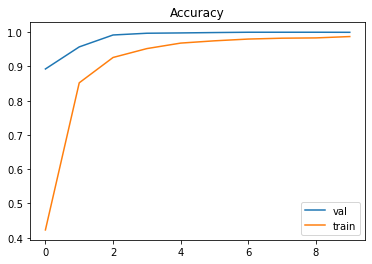

In [17]:
plt.plot(results.history['val_accuracy'], label="val")
plt.plot(results.history['accuracy'], label="train")
plt.legend()
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

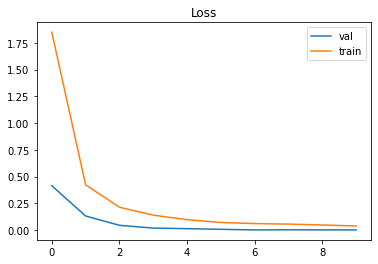

In [18]:
plt.plot(results.history['val_loss'], label="val")
plt.plot(results.history['loss'], label="train")
plt.legend()
plt.title("Loss")

In [19]:
predictions = model.predict(x_test)
predictions = np.where(predictions>0.5, 1, 0)
count = 0
incorrect = []
for i in range(len(predictions)):
  if (predictions[i] == y_test[i]).all():
    count += 1
  else:
    incorrect.append(i)
print("Total correct: ", count, " of ", len(predictions))
print("Proportion Correct: ", count/len(predictions))
# print("Incorrect: ", incorrect)

Total correct:  6900  of  7172
Proportion Correct:  0.96207473508087


(1, 28, 28, 1)
image class:  K
prediction:  K


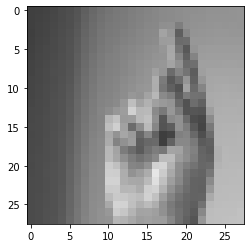

In [22]:
# Consruct image from array
from PIL import Image
n = np.random.randint(7173, size=1)
image_array = x_test[n].flatten() * 255
print(x_test[n].shape)
image_class = np.argmax(y_test[n])
image_array = np.array([(i, i, i) for i in image_array])
image_array = image_array.reshape(28, 28, 3)

# Use PIL to create an image from the new array of pixels

new_image = Image.fromarray(np.array(image_array, dtype=np.uint8))
new_image.save('new.png')
plt.imshow(new_image)
print("image class: ", chr(image_class+97).upper())
image_prediction = np.argmax(model.predict(x_test[n].flatten().reshape(1, 28, 28, 1)))
print("prediction: ", chr(image_prediction+97).upper())
# print("Raw input: ", x_test[n].flatten().reshape(1, 28, 28, 1))
# print("Raw prediction: ", model.predict(x_test[n].flatten().reshape(1, 28, 28, 1)))

In [23]:
# Just testing something to make sure im not stupid
np.unique([np.argmax(y_test[i]) for i in range(len(y_test))])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [ ]:
model.save("ASLMODEL.h5")

In [24]:
predictions = model.predict(x_test)
print(predictions)
print(y_test)

[[2.2936514e-14 3.3896386e-12 3.5636514e-08 ... 4.5419080e-15
  2.2280746e-07 1.2017365e-10]
 [4.2511949e-11 1.9474112e-06 1.5296465e-11 ... 1.2829684e-05
  1.0436427e-09 2.9180080e-07]
 [1.4719179e-30 3.5756570e-19 4.2605051e-28 ... 1.9834389e-14
  3.8790948e-16 2.9850932e-13]
 ...
 [2.7642621e-16 1.0552429e-19 9.9999726e-01 ... 2.0576323e-28
  1.3240436e-15 3.4127468e-22]
 [5.6990402e-11 8.7329997e-11 2.0930343e-16 ... 1.0170809e-13
  2.1586316e-11 3.1195392e-24]
 [1.3401383e-17 1.3667394e-21 9.9999964e-01 ... 4.1384687e-30
  1.9270930e-16 5.8771942e-23]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [25]:
from sklearn.metrics import confusion_matrix
alphabet=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']
matrix = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1), normalize='true')
# matrix

In [29]:

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=False, cmap=sns.cm.rocket_r)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

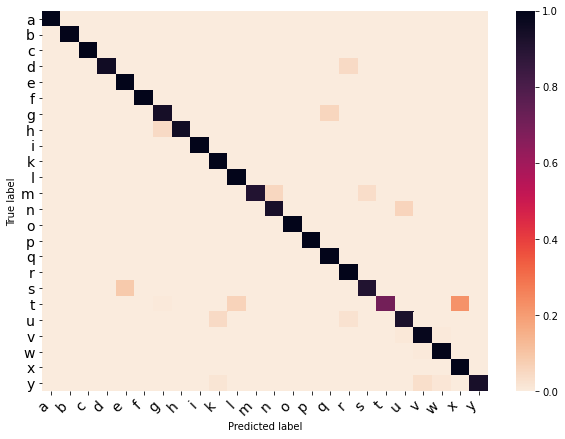

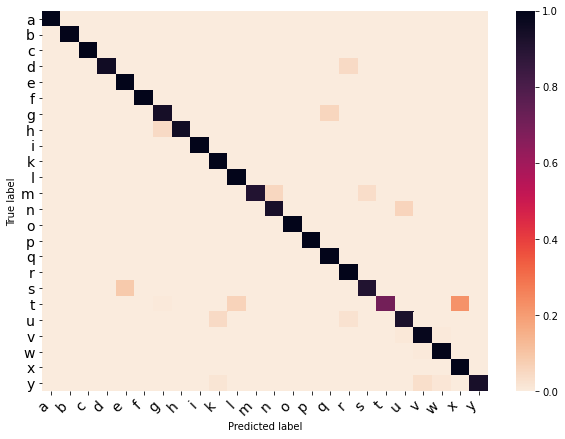

In [30]:
print_confusion_matrix(matrix, alphabet)

In [31]:
import tensorflow.lite as lite
converter = lite.TFLiteConverter.from_keras_model(model) # Your model's name
model = converter.convert()
file = open( 'model.tflite' , 'wb' ) 
file.write( model )
# convert to tflite for android studio

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\shrey\AppData\Local\Temp\tmpaiapsnyx\assets


676016